In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset/diabetes.csv")
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [3]:
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in cols_to_replace:
    data[column] = data[column].replace(0, np.nan)
    data[column] = data[column].fillna(round(data[column].mean(skipna=True)))

In [4]:
# Split features and target
X = data.iloc[:, :8]
Y = data['Outcome']

In [6]:
# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

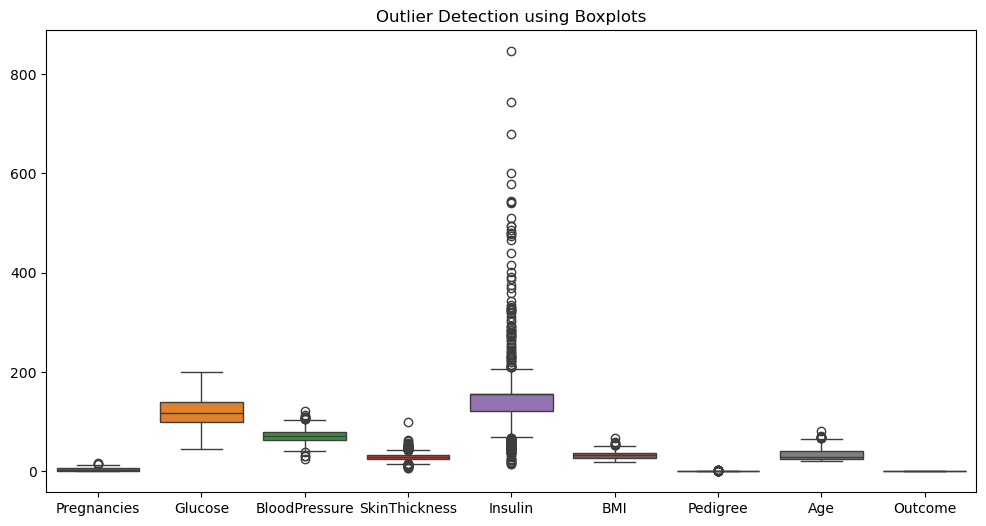

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.title("Outlier Detection using Boxplots")
plt.show()

In [8]:
# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)


Number of Outliers per Feature:
 Pregnancies        4
Glucose            0
BloodPressure     14
SkinThickness     87
Insulin          159
BMI                8
Pedigree          29
Age                9
Outcome            0
dtype: int64


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
f1 = f1_score(Y_test, knn_pred)

In [11]:
print("\nConfusion Matrix:\n", cm)
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
 [[88 19]
 [19 28]]
Accuracy Score: 0.7532
Error Rate: 0.2468
Precision Score: 0.5957
Recall Score: 0.5957
F1 Score: 0.5957


In [12]:
accuracy_scores = []
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(Y_test, y_pred_k)
    accuracy_scores.append(acc)
    print(f"K = {k} → Accuracy = {acc * 100:.2f}%")

K = 3 → Accuracy = 72.73%
K = 5 → Accuracy = 75.32%
K = 7 → Accuracy = 75.97%


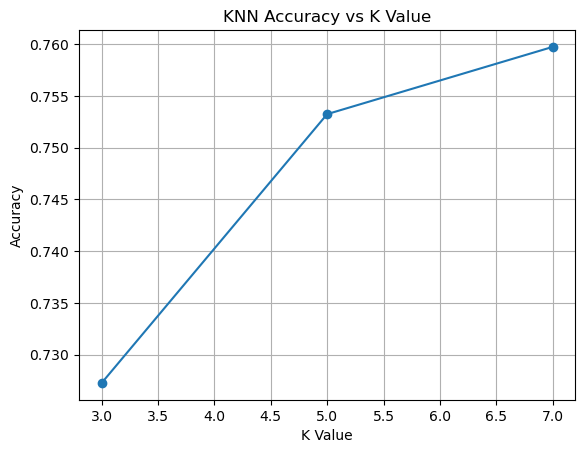

In [13]:

plt.plot([3, 5, 7], accuracy_scores, marker='o')
plt.title("KNN Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()